<a href="https://colab.research.google.com/github/adlihs/PyTorch/blob/main/Solving_Problems_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Person**: A bike delivery person with a 7-mile delivery order.

**Situation**: The company promises delivery in under 30 minutes and one more late delivery could put the job at risk.

**Question**: Can the bike delivery person makes this delivery on time?


**Next Steps based on ML pipeline:**


*   **Prepare** delivery data, the distances and times from past orders
*   **Build** a simple neural network using Pytorch
*   **Train** it to find the relationship between distance and delivery time.
*   **Predict** whether the delivery person can make that 7-mile delivery in time




## Imports

In [ ]:
!pip install helper_utils

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

import helper_utils

torch.manual_seed(42)

## Data Ingestion and Preparation
Let's use some manual data to simulate delivery logs from a datasource

Two essential `tensors` for this task:

*   The `distance` tensor contains how far the person biked for four recent deliveries (in miles)
*   The `times` tensor shows how long each delivery took (in minutes)
*   `dtype=torch.float32` sets your data tyoe to 32-bit floating point values for precise calculations.



In [8]:
# distances in miles for recent bike deliveries
distances = torch.tensor([[1.0],[2.0],[3.0],[4.0]], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([[6.96],[12.11],[16.77],[22.21]], dtype=torch.float32)

## Model Building
Let's assume, for bike deliveries, a linear relationship between distance and time.
The model will be a single neuron that learns this relationship.

A single neuron with one input implements a linear equation:
| `Time = W * Distance + B`

The idea is to find the best value for **weight (W)** and **bias (B)** that the delivery data.

In [6]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(1,1))

## Training
Two key tools  to help the model learn from data:

*   **Loss Function:** `nn.MSELoss` defines the Mean Squared Error loss function
*   **Optimizer:** `optim.SGD` sets up the Stochastic Gradient Descent optimizer.
    * `lr=0.01` as learning rate.



In [7]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
# Training loop
for epoch in range(500):
  # Reset the optimizer's gradients
  optimizer.zero_grad()

  # Make predictions (forward pass)
  outputs = model(distances)

  # Calculate the loss
  loss = loss_function(outputs, times)

  # Calculate adjustments (backward pass)
  loss.backward()

  # Update the model's parameters
  optimizer.step()

  # Print loss every 50 epochs
  if (epoch + 1) % 50 == 0:
    print(f"epoch {epoch + 1}: Loss = {loss.item()}")


epoch 50: Loss = 0.03944866359233856
epoch 100: Loss = 0.035811737179756165
epoch 150: Loss = 0.0331188440322876
epoch 200: Loss = 0.03112369030714035
epoch 250: Loss = 0.029645616188645363
epoch 300: Loss = 0.02855011820793152
epoch 350: Loss = 0.0277385413646698
epoch 400: Loss = 0.027137158438563347
epoch 450: Loss = 0.026691725477576256
epoch 500: Loss = 0.026361485943198204


## Visualizing the training results
Let's use the `plot_results`, this will show:



*   Original data points (actual deliveries)
*   The line the model learned (it's predictions)
*   How well they match



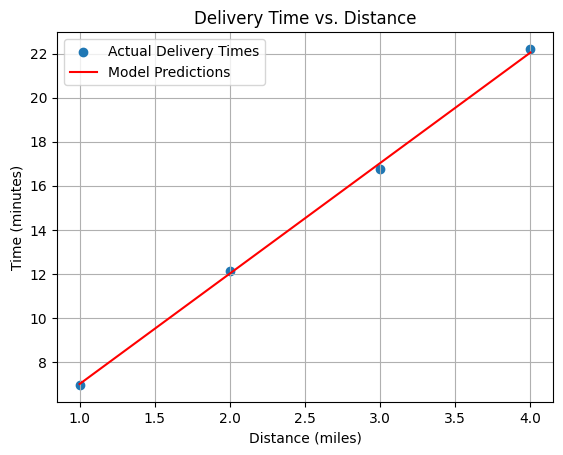

In [16]:
import matplotlib.pyplot as plt

def plot_results(model, distances, times):
    # Plot original data points
    plt.scatter(distances.numpy(), times.numpy(), label='Actual Delivery Times')

    # Get model predictions
    with torch.no_grad(): # Disable gradient calculation for inference
        predicted_times = model(distances)

    # Plot the learned line
    plt.plot(distances.numpy(), predicted_times.numpy(), color='red', label='Model Predictions')

    plt.xlabel('Distance (miles)')
    plt.ylabel('Time (minutes)')
    plt.title('Delivery Time vs. Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results(model, distances, times)